In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-globalapprox-polynomial)=
# Polynomial interpolation

```{index} interpolation; by polynomials, Julia; indexing arrays
```

In {numref}`section-linsys-polyinterp` and {numref}`section-localapprox-interpolation` we encountered polynomial interpolation for the $n+1$ data points $(t_0,y_0),\ldots, (t_n,y_n)$. As before, we use $t_i$ to denote interpolation or data nodes, and $x$ to denote the independent variable. Remember that while our mathematical notation starts indexing the points at zero, in our codes we have to shift the indices up by 1.

Theoretically, we can always construct an interpolating polynomial, and the result is unique among polynomials whose degree is less than $n+1$.

(theorem-polyinterp)=
::::{proof:theorem}
If the nodes $t_0,\dots,t_n$ are all distinct, there exists a unique polynomial $p$ of degree at most $n$ that satisfies $p(t_k)=y_k$ for all $k=0,\dots,n$.
::::

::::{proof:proof}
We defer the existence part to Equation {eq}`lagrangeinterp`.  As for uniqueness, if $p$ and $q$ are two interpolating polynomials, then $p-q$ is a  polynomial of degree at most $n$ that is zero at the $n+1$ points  $t_0,\dots,t_n$. By the Fundamental Theorem of Algebra, which states that a $k$th degree polynomial has no more than $k$ roots, we conclude that $p-q\equiv 0$, so $p=q$.
::::

## Lagrange formula

```{index} cardinal function
```

In our earlier encounters with polynomial interpolation, we found the interpolant by solving a linear system of equations with a Vandermonde matrix. The first step was to express the polynomial in the natural monomial basis $1,x,x^2,\ldots$. However, as we saw in {numref}`section-localapprox-pwlin`, no basis is more convenient than a *cardinal basis*, in which each member is one at a single node and zero at all of the other nodes. 

It is surprisingly straightforward to construct a cardinal basis for global polynomial interpolation. By definition, each member $\ell_{k}$ of the basis, for $k=0,\ldots,n$, is an $n$th degree polynomial satisfying the cardinality conditions

:::{math}
:label: lagrangecond
  \ell_{k}(t_j) = \begin{cases}
  1 &\text{if $j=k$,}\\
  0 & \text{otherwise.}
  \end{cases}
:::

Recall that any polynomial of degree $n$ can be expressed as

$$
c(x-r_1)(x-r_2)\dots(x-r_n) = c\prod_{k=1}^n(x-r_k),
$$

where $r_1,\dots,r_n$ are the roots of the polynomial and $c$ is a constant. The conditions {eq}`lagrangecond` give all $n$ roots of $\ell_{k}$, and the normalization $\ell_{k}(t_k)=1$ tells us how to find $c$. 


```{index} ! Lagrange polynomial
```

::::{proof:definition} Lagrange cardinal polynomial
Given distinct nodes $t_0,\ldots,t_n$, the polynomial
:::{math}
:label: lagrange
\ell_{k}(x) & = \frac{(x-t_0)\dots(x-t_{k-1})(x-t_{k+1})\dots(x-t_n)}{(t_k-t_0)\dots(t_k-t_{k-1})(t_k-t_{k+1})\dots(t_k-t_n)} \\[1mm]
&= \prod_{\substack{i=0\\i\ne k}}^n \frac{(x-t_i)}{(t_k-t_i)}
:::

is of degree at most $n$ and satisfies the cardinality conditions {eq}`lagrangecond`.
::::

(demo-polynomial-lagrange)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Here is a vector of nodes.

In [2]:
t = [ 1, 1.5, 2, 2.25, 2.75, 3 ]
n = length(t)-1;

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Let's apply the definition of the cardinal Lagrange polynomial for $k=2$. First we define a polynomial $q$ that is zero at all the nodes except $i=k$. Then $\ell_2$ is found by normalizing $q$ by $q(t_k)$.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
Character ℓ is typed as `\ell`+<kbd>Tab</kbd>.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [3]:
k = 2
q = x -> prod( x-t[i] for i in [0:k-1;k+1:n].+1 )
ℓₖ = x -> q(x) / q(t[k+1]);

A plot confirms the cardinal property of the result.

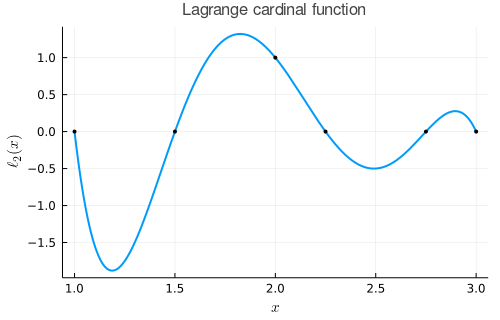

In [4]:
plot(ℓₖ,1,3)
y = zeros(n+1);  y[k+1] = 1
scatter!(t,y,color=:black,
    xaxis=(L"x"),yaxis=(L"\ell_2(x)"),title="Lagrange cardinal function")

Observe that $\ell_k$ is _not_ between zero and one everywhere, unlike a hat function.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

Because they are a cardinal basis, the Lagrange polynomials lead to a simple expression for the polynomial interpolating the $(t_k,y_k)$ points.

```{index} ! Lagrange interpolation formula
```

(theorem-polynomial-lagrange)=
::::{proof:theorem} Lagrange interpolation formula
Given points $(t_k,y_k)$ for $k=0,\ldots,n$ with all the $t_k$ distinct, the unique polynomial of degree $n$ or less that interpolates the points is

:::{math}
:label: lagrangeinterp
p(x) = \sum_{k=0}^n y_k \ell_k(x).
:::
::::

At this point we can say that we have completed the proof of {numref}`Theorem %s <theorem-polyinterp>`.

(example-ClassicalLagrange)=
::::{proof:example}
We construct the Lagrange interpolating polynomials of degrees $n=1$ and 2 to interpolate samples of $f(x) = \tan (x)$.  For $n=1$, we use $t_0= 0$ and $t_1 = \pi/3$. The Lagrange formula then gives

\begin{align*}
  P_1(x) & = y_0 \ell_0(x)  +  y_1 \ell_1(x) \\
      & = y_0 \frac{x-t_1}{t_0-t_1} + y_1 \frac{x-t_0}{t_1-t_0} \\
      & = 0 \cdot \frac{x-\frac{\pi}{3}}{0-\frac{\pi}{3}} + \sqrt{3} \cdot \frac{x-0}{\frac{\pi}{3}-0} \\
      & = \frac{3 \sqrt{3}}{\pi} x.
\end{align*}

This is the unique linear function passing through $(0,0)$ and $(\pi/3,\sqrt{3})$.

For $n=2$, we use $t_0= 0$, $_1 = \pi/6$ and $t_2 = \pi/3$. We now have

\begin{align*}
  P_2(x) & = y_0 \ell_0(x) +  y_1 \ell_1(x) +  y_2 \ell_2(x) \\
    & = y_0 \frac{(x-t_1)(x-t_2)}{(t_0-t_1)(t_0-t_2)}  +
        y_1 \frac{(x-t_0)(x-t_2)}{(t_1-t_0)(t_1-t_2)}  +
        y_2  \frac{(x-t_0)(x-t_1)}{(t_2-t_0)(t_2-t_1)} \\
    & = 0
      + \frac{1}{\sqrt{3}} \frac{\left(x-0\right)\left(x-\frac{\pi}{3}\right)}
      {\left(\frac{\pi}{6}-0\right)\left(\frac{\pi}{6}-\frac{\pi}{3}\right)}
      + \sqrt{3} \frac{\left(x-0\right)\left(x-\frac{\pi}{6}\right)}
      {\left(\frac{\pi}{3}-0\right)\left(\frac{\pi}{3}-\frac{\pi}{6}\right)}
           = \frac{6\sqrt{3}}{\pi^2}x^2 + \frac{\sqrt{3}}{\pi} x.
\end{align*}
::::

## Error formula

In addition to existence, uniqueness,  and the constructive Lagrange formula, we have a useful formula for the error in a polynomial interpolant when the data are samples of a smooth function. We will refer to the following definition.

(definition-polynomial-indicator)=
::::{proof:definition} Error indicator function
The **error indicator function** for a set of distinct nodes $t_0,\ldots,t_n$ is
:::{math}
:label: lagrange-phi
\Phi(x) = \prod_{i=0}^n (x-t_i).
:::
::::

(theorem-polynomial-interperror)=
::::{proof:theorem} Polynomial interpolation error
Let $t_0,\dots,t_n$ be distinct points in $[a,b]$, and suppose $f$ has at least $n+1$ continuous derivatives in that interval. Let $p(x)$ be the unique polynomial of degree at most $n$ interpolating $f$ at $t_0,\dots,t_n$. Then for each $x\in[a,b]$, there exists a number $\xi(x)\in(a,b)$ such that
  
:::{math}
:label: interperror
f(x) - p(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \Phi(x),
:::

with $\Phi$ given in {eq}`lagrange-phi`.
::::

::::{proof:proof}
If $x=t_i$ for some $i$, the statement of the theorem is trivially true. Otherwise, we define a new function $g(s)$ by
  
$$
g_x(s) = \Phi(s)[f(x)-p(x)] - \Phi(x)[f(s)-p(s)].
$$

Note that $x$ is now arbitrary but fixed. Clearly $g_x(t_i)=0$ for each $i=0,\dots,n$, because both $\Phi$ and the error $f-p$ have that property. Also, $g_x(x)=0$. So $g_x$ has at least $n+2$ zeros in $[a,b]$. This is possible only if $g_x$ has at least $n+1$ local minima in $(a,b)$; i.e., $g_x'$ has at least $n+1$ zeros. But that implies that $g_x''$ must have at least $n$ zeros, etc. Eventually we conclude that $g_x^{(n+1)}$ has at least one zero in $(a,b)$. Let $\xi(x)$ be such a zero.

Observe that $\Phi$ is a monic polynomial (i.e., its leading coefficient is 1) of degree $n+1$. Hence $\Phi^{(n+1)}(t)=(n+1)!$. Since $p$ has degree at most $n$, $p^{(n+1)}=0$. Finally, we write
  
\begin{align*}
0 = g_x^{(n+1)}(\xi) &= \Phi^{(n+1)}(\xi)[f(x)-p(x)] - \Phi(x)[f^{(n+1)}(\xi)-p^{(n+1)}(\xi)]\\
&= (n+1)!\,[f(x)-p(x)] - \Phi(x)f^{(n+1)}(\xi),
\end{align*}

which is a restatement of {eq}`interperror`.
::::

Usually $f^{(n+1)}$ and the function $\xi(x)$ are unknown. The importance of the formula {eq}`interperror` is how it helps to express the error as a function of $x$, and its dependence on the nodes $t_0,\dots,t_n$. We will exploit this knowledge later.

(demo-polynomial-error)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Consider the problem of interpolating $\log(x)$ at these nodes:

In [5]:
t =  [ 1, 1.6, 1.9, 2.7, 3 ]
n = length(t)-1;

Here $n=4$ and $f^{(5)}(\xi) = 4!/\xi^5$. For $\xi\in[1,3]$ we can say that $|f^{(5)}(\xi)| \le 4!$. Hence 

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
$$ |f(x)-p(x)| \le \frac{1}{5} \left| \Phi(x) \right|.$$

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
Character Φ is typed as `\Phi`+<kbd>Tab</kbd>. (Note the capitalization.)
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

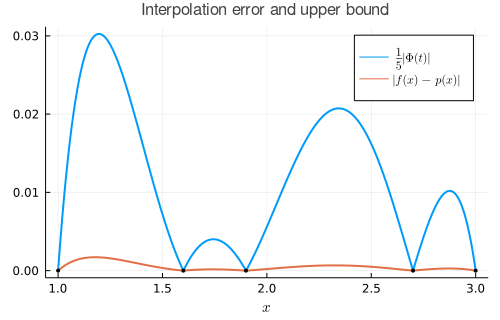

In [6]:
Φ = x -> prod(x-tᵢ for tᵢ in t)
plot(x->0.2*abs(Φ(x)),1,3,label=L"\frac{1}{5}|\Phi(t)|" )
p = Polynomials.fit(t,log.(t))
plot!(t->abs(log(t)-p(t)),1,3,label=L"|f(x)-p(x)|")
scatter!(t,zeros(size(t)),color=:black,
    xaxis=(L"x"),title="Interpolation error and upper bound")

The error is zero at the nodes, by the definition of interpolation. The error bound, as well as the error itself, has one local maximum between each consecutive pair of nodes.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

For equispaced nodes, {numref}`Theorem %s <theorem-polyinterp>` has an immediate consequence. 

(theorem-polyequi)=
::::{proof:corollary}
Suppose $t_i=i h$ for constant step size $h$ and all $i=0,1,\ldots,n$, and that $f$ has $n+1$ continuous derivatives in $(t_0,t_n)$. If $x\in[t_0,t_n]$, then there exists $\xi(x)\in(t_0,t_n)$ and $C$ independent of $x$ such that
  
:::{math}
:label: equisperror
|f(x) - p(x)| \le C f^{(n+1)}(\xi) h^{n+1}.
:::

In particular, $|f(x)-p(x)|=O(h^{n+1})$ as $h\to 0$.
::::

::::{proof:proof}
If $x\in[t_0,t_n]$, then $|x-t_i|<nh$ for all $i$, and {eq}`interperror` implies {eq}`equisperror`. As $h\to 0$, $\xi\to x$, and the continuity of $f^{(n+1)}$ allows us to make the asymptotic conclusion.
::::

```{index} order of accuracy
```

This result is consistent with our observations in {numref}`section-localapprox-fd-converge`: piecewise linear interpolation with node spacing $h$ has accuracy $O(h^2)$, and the error of a finite-difference method for the first derivative based on $n+1$ nodes of spacing $h$ is $O(h^n)$, remembering the division by $h$ in a finite-difference formula.

As presented in {eq}`lagrangeinterp`, the Lagrange formula is not a good choice for numerical computation, because it is unstable (see [Exercise 7](problem-lagrange-instability)). In the next section we derive an algebraically equivalent formula that is both numerically stable and faster to apply.

## Exercises

(problem-polynomial-lagrange)=
1. ✍ Write out the Lagrange form of the interpolating polynomial of degree $n$ for the given functions and nodes. Using a calculator, evaluate the polynomial at $x=\pi/4$ and compute the error there.

    **(a)** $f(x) = \sin(x), \ n=1, \ t_0=0, t_1 = \pi/2$

    **(b)** $f(x) = \sin(x), \ n=2, \ t_0=0, t_1 = \pi/6, t_2 = \pi/2$

    **(c)** $f(x) = \cos(x), \ n=2, \ t_0=0, t_1 = \pi/3, t_2 = \pi/2$

    **(d)** $f(x) = \tanh(x), \ n=2, \ t_0=0, t_1 = \pi/3, t_2 = \pi/2$

2. ⌨ For each case, plot the requested Lagrange cardinal polynomial for the given set of nodes over the interval $[t_0,t_n]$. Superimpose dots or circles for the points represented by the cardinal conditions {eq}`lagrangecond`. 

    **(a)** $n=2,\quad t_0=-1, \, t_1=-0.2,\, t_2=0, \quad \ell_2(x)$
    
    **(b)** $n=4,\quad t_0=0, \, t_1=1,\, t_2=1.5,\, t_3=2.5,\, t_4=3, \quad \ell_3(x)$

    **(c)** $n=20, \quad t_i=i/n \text{ for } i=0,\ldots,n, \quad \ell_0(x)$

    **(d)** $n=20, \quad t_i=i/n \text{ for } i=0,\ldots,n, \quad \ell_{10}(x)$ 

    **(e)** $n=40, \quad t_i=i/n \text{ for } i=0,\ldots,n, \quad \ell_{20}(x)$ 

3. ✍ Suppose $p$ is the quadratic polynomial interpolating the points $(-2,12)$, $(1,3a)$, and $(2,0)$. Use {eq}`lagrangeinterp` to compute $p'(0)$. 

4. ✍ Explain carefully why using {eq}`lagrangeinterp` to compute $p(x)$ at a single value of $x$ takes $O(n^2)$ floating-point operations.

5. ✍  Explain why for any distribution of nodes and all $x$,
    
    $$
    1 = \sum_{k=0}^n \ell_k(x).
    $$
   
    (Hint: This problem does not require any hand computation or manipulation. What is being interpolated here?) 

6. ✍ Show that
    
    $$
    \ell_k(x) = \frac{\Phi(x)}{(x-t_k)\Phi'(t_k)},
    $$

    where $\Phi$ is the function defined in {eq}`lagrange-phi`. 

    (problem-lagrange-instability)=
7. ✍ Consider the nodes $t_0=0$, $t_1=1$, $t_2=\beta$, where $\beta>1$.

    **(a)** Write out the Lagrange cardinal polynomials $\ell_0$, $\ell_1$, and $\ell_2$.      
    
    **(b)** Set $x=1/2$ in the part (a) results, and suppose $y_1 = y_2$. As $\beta\to 1$ from above, why should we expect subtractive cancellation?